In [30]:

# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


In [31]:
df = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')

In [32]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [33]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [34]:
df.groupby('embarked').size()

embarked
C    270
Q    123
S    914
dtype: int64

In [35]:
df.drop(['name','ticket','cabin','body','home.dest'],axis=1,inplace=True)
df.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,NaN
3,1,0,male,30.00,1,2,151.5500,S,NaN
4,1,0,female,25.00,1,2,151.5500,S,NaN


In [36]:
df['foundboat'] = np.where(df['boat'].isna()==False, 1,0) 
print(df.groupby(['foundboat','boat']).size())
print(df.groupby(['foundboat']).size())

foundboat  boat   
1          1           5
           10         29
           11         25
           12         19
           13         39
           13 15       2
           13 15 B     1
           14         33
           15         37
           15 16       1
           16         23
           2          13
           3          26
           4          31
           5          27
           5 7         2
           5 9         1
           6          20
           7          23
           8          23
           8 10        1
           9          25
           A          11
           B           9
           C          38
           C D         2
           D          20
dtype: int64
foundboat
0    823
1    486
dtype: int64


In [37]:
df.drop(['boat'],axis=1,inplace=True)


In [38]:
df.head()
#sibsp  = # of siblings / spouses aboard the Titanic
#parch = # of parents / children aboard the Titanic

,pclass,survived,sex,age,sibsp,parch,fare,embarked,foundboat
0,1,1,female,29.00,0,0,211.3375,S,1
1,1,1,male,0.92,1,2,151.5500,S,1
2,1,0,female,2.00,1,2,151.5500,S,0
3,1,0,male,30.00,1,2,151.5500,S,0
4,1,0,female,25.00,1,2,151.5500,S,0


In [39]:
df.groupby(['sibsp']).size()

sibsp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
dtype: int64

In [40]:
df.groupby(['parch']).size()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
dtype: int64

In [ ]:
# need to encode remaining 2 variables 

In [43]:
#try pd.get_dummies 
#use a new df, usefull to do counts later on 
df_enc = pd.get_dummies(data = df, columns = ['embarked', 'sex'] ) #add manufacturer later

df_enc.head()

,pclass,survived,age,sibsp,parch,fare,foundboat,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,1,29.00,0,0,211.3375,1,0,0,1,1,0
1,1,1,0.92,1,2,151.5500,1,0,0,1,0,1
2,1,0,2.00,1,2,151.5500,0,0,0,1,1,0
3,1,0,30.00,1,2,151.5500,0,0,0,1,0,1
4,1,0,25.00,1,2,151.5500,0,0,0,1,1,0


In [44]:
df_enc.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'foundboat',
       'embarked_C', 'embarked_Q', 'embarked_S', 'sex_female', 'sex_male'],
      dtype='object')

In [45]:
df_enc.isna().sum()/len(df)


pclass        0.000000
survived      0.000000
age           0.200917
sibsp         0.000000
parch         0.000000
fare          0.000764
foundboat     0.000000
embarked_C    0.000000
embarked_Q    0.000000
embarked_S    0.000000
sex_female    0.000000
sex_male      0.000000
dtype: float64

In [47]:
df_enc.dropna(subset=['fare'],inplace=True) #looks in specific columns 


Accuracy: 0.9745547073791349


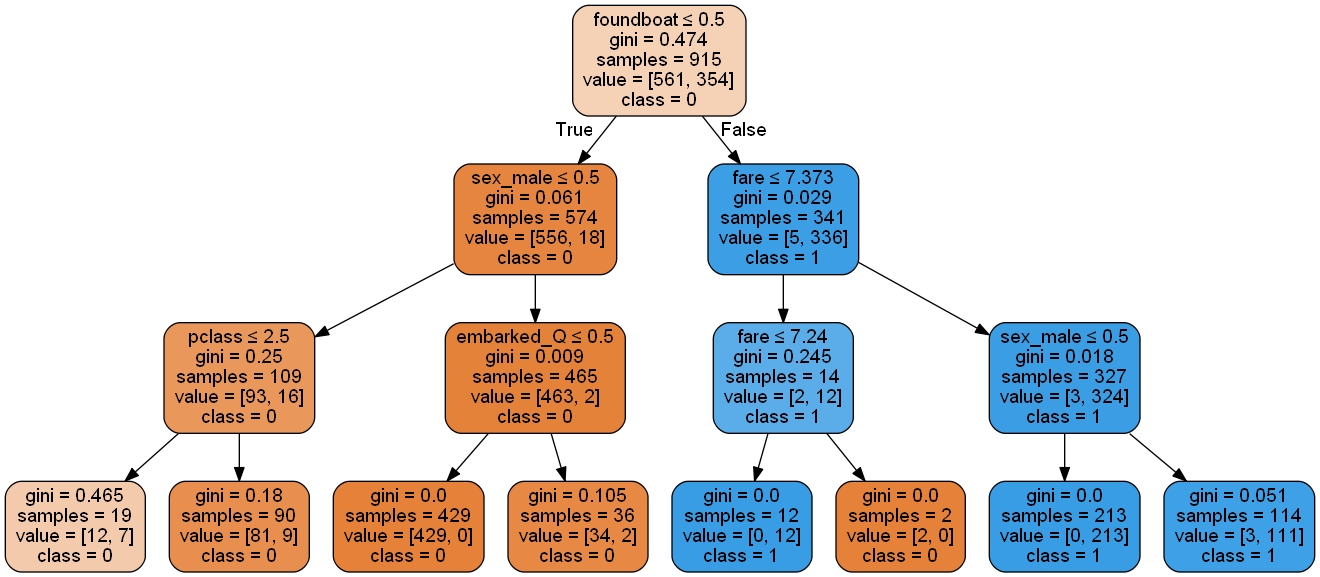

In [50]:
#combine all the steps for the tree 

#split dataset in features and target variable
feature_cols = ['pclass', 'sibsp', 'parch', 'fare', 'foundboat', 
                'embarked_C', 'embarked_Q', 'embarked_S', 'sex_female', 'sex_male'] #removed age
X = df_enc[feature_cols] # Features
y = df_enc['survived'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


clf = DecisionTreeClassifier(criterion='gini'
                             ,max_depth=3 
                            # ,min_samples_split = 50 #The minimum number of samples required to split an internal node
                            # ,min_samples_leaf = 45 #min size of leaf
                            # ,min_weight_fraction_leaf = 0.1 #The % of leaf that makes the total start
                            # ,max_leaf_nodes = 4 #max number of leaf at the bottom
                            )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

Accuracy: 0.9770992366412213


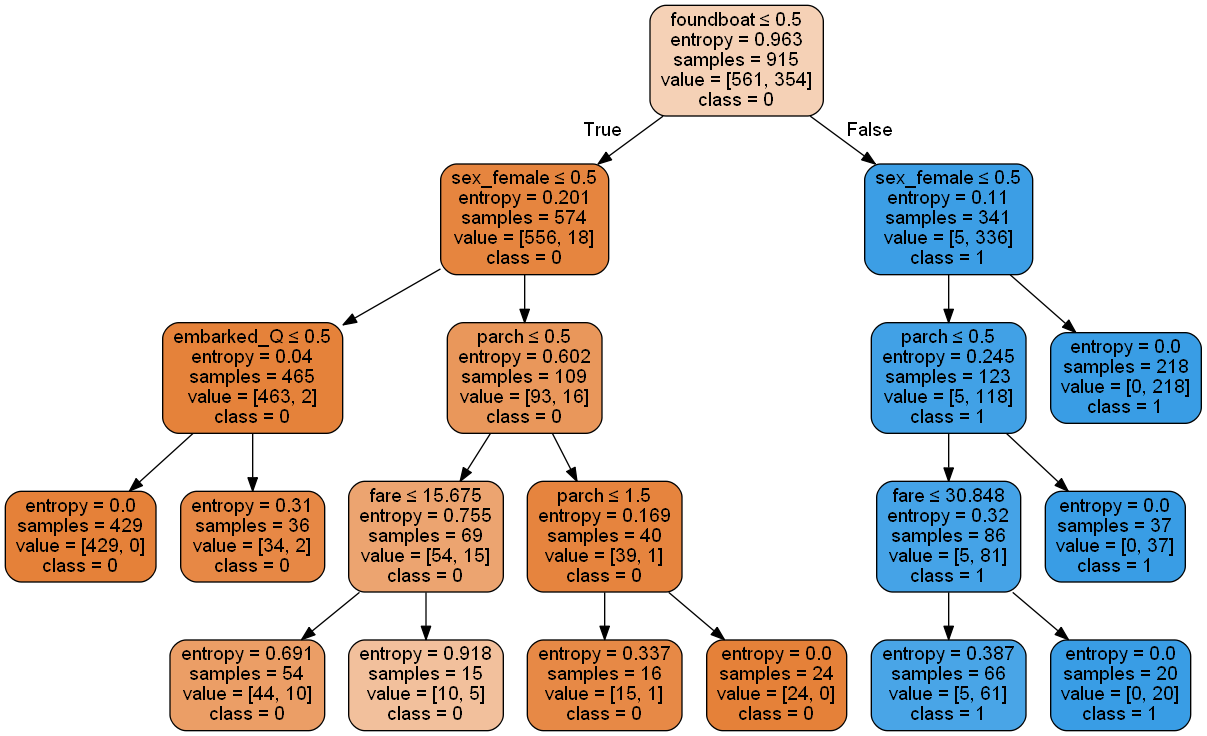

In [52]:
#combine all the steps for the tree 

#split dataset in features and target variable
feature_cols = ['pclass', 'sibsp', 'parch', 'fare', 'foundboat', 
                'embarked_C', 'embarked_Q', 'embarked_S', 'sex_female', 'sex_male']
X = df_enc[feature_cols] # Features
y = df_enc['survived'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


clf = DecisionTreeClassifier(criterion='entropy'
                             ,max_depth=4 
                            # ,min_samples_split = 50 #The minimum number of samples required to split an internal node
                             ,min_samples_leaf = 15 #min size of leaf
                            # ,min_weight_fraction_leaf = 0.1 #The % of leaf that makes the total start
                            # ,max_leaf_nodes = 4 #max number of leaf at the bottom
                            )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

In [54]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'foundboat'],
      dtype='object')

In [55]:
df.groupby(['foundboat','sex','survived']).size()

foundboat  sex     survived
0          female  0           126
                   1            21
           male    0           674
                   1             2
1          female  0             1
                   1           318
           male    0             8
                   1           159
dtype: int64

# see if I can get shap working

In [56]:
import shap

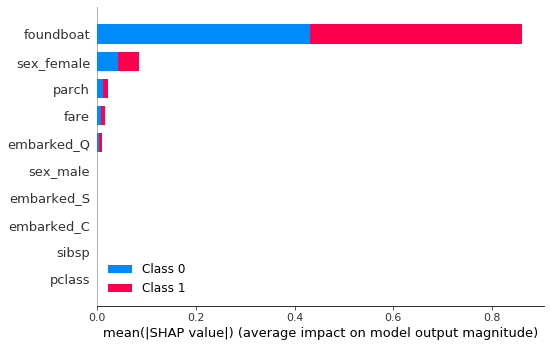

In [59]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [60]:


shap.decision_plot(expected_value, shap_values, features_display)


NameError: name 'expected_value' is not defined